In [1]:
import os
import numpy as np
import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Layer 
# from skimage import metrics

In [2]:
seed_val = 42
np.random.seed(seed_val)

# Question 1

**Autoencoders** : In this task, consider the MNIST dataset for training autoencoder models (with a suitable regularization) with hidden (latent) dimension of 32 and 64.

In [3]:

# Load the MNIST dataset
(x_train, train_labels), (x_test, test_labels) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [4]:

def build_autoencoder(latent_dim=64):
    # Create the encoder
    encoder_input = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(encoder_input)
    encoder = Model(encoder_input, encoded)

    # Create the decoder
    decoder_input = Input(shape=(latent_dim,))
    decoded = Dense(784, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-6))(decoder_input)
    decoder = Model(decoder_input, decoded)

    # Create the autoencoder
    autoencoder_input = Input(shape=(784,))
    encoded_output = encoder(autoencoder_input)
    decoded_output = decoder(encoded_output)
    autoencoder = Model(autoencoder_input, decoded_output)

    # Set optimizer with learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=5e-01,
        decay_steps=2500,
        decay_rate=0.75,
        staircase=True
    ) 
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=lr_schedule,
        beta_1=0.95,
        beta_2=0.99,
        epsilon=1e-01
    )

    autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

    return encoder, decoder, autoencoder

In [5]:
def find_reconstruction_error(autoencoder):
    # Predict the reconstructed images for both train and test datasets
    decoded_imgs_train = autoencoder.predict(x_train)
    decoded_imgs_test = autoencoder.predict(x_test)
    
    x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
    x_test_reshaped = x_test.reshape(x_test.shape[0], -1)
    decoded_imgs_train_reshaped = decoded_imgs_train.reshape(decoded_imgs_train.shape[0], -1)
    decoded_imgs_test_reshaped = decoded_imgs_test.reshape(decoded_imgs_test.shape[0], -1)
    
    # Calculate the Mean Squared Error (MSE) 
    mse_train = np.mean(np.square(x_train_reshaped - decoded_imgs_train_reshaped), axis=1)
    mse_test = np.mean(np.square(x_test_reshaped - decoded_imgs_test_reshaped), axis=1)
    
    # finding the average reconstruction errors for train and test datasets
    avg_mse_train = np.mean(mse_train)
    avg_mse_test = np.mean(mse_test)
    
    print(f"Average reconstruction error (MSE) for train dataset: {avg_mse_train}")
    print(f"Average reconstruction error (MSE) for test dataset: {avg_mse_test}")


In [6]:
encoder_64,decoder_64,autoencoder_64 = build_autoencoder(latent_dim=64)
encoder_32,decoder_32,autoencoder_32 = build_autoencoder(latent_dim=32)

In [7]:

# Train the autoencoder
history_64 = autoencoder_64.fit(x_train, x_train,
                epochs=25,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1821 - val_loss: 0.0701
Epoch 2/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0689 - val_loss: 0.0645
Epoch 3/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0624 - val_loss: 0.0548
Epoch 4/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0533 - val_loss: 0.0476
Epoch 5/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0468 - val_loss: 0.0430
Epoch 6/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0425 - val_loss: 0.0396
Epoch 7/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0393 - val_loss: 0.0369
Epoch 8/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0367 - val_loss: 0.0347
Epoch 9/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0346 - val_loss: 0.0328
Epoch 10/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0327 - val_loss: 0.0311
Epoch 11/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0311 - val_loss: 0.0296
Epoch 12/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [8]:
find_reconstruction_error(autoencoder_64)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
Average reconstruction error (MSE) for train dataset: 0.0179150253534317
Average reconstruction error (MSE) for test dataset: 0.017482947558164597


In [9]:

# Train the autoencoder
history_32 = autoencoder_32.fit(x_train, x_train,
                epochs=25,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1870 - val_loss: 0.0705
Epoch 2/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0696 - val_loss: 0.0660
Epoch 3/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0643 - val_loss: 0.0584
Epoch 4/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0569 - val_loss: 0.0514
Epoch 5/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0503 - val_loss: 0.0461
Epoch 6/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0454 - val_loss: 0.0422
Epoch 7/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0419 - val_loss: 0.0394
Epoch 8/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0391 - val_loss: 0.0372
Epoch 9/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0371 - val_loss: 0.0354
Epoch 10/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0353 - val_loss: 0.0339
Epoch 11/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - val_loss: 0.0325
Epoch 12/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [10]:
find_reconstruction_error(autoencoder_32)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
Average reconstruction error (MSE) for train dataset: 0.021551620215177536
Average reconstruction error (MSE) for test dataset: 0.021121244877576828


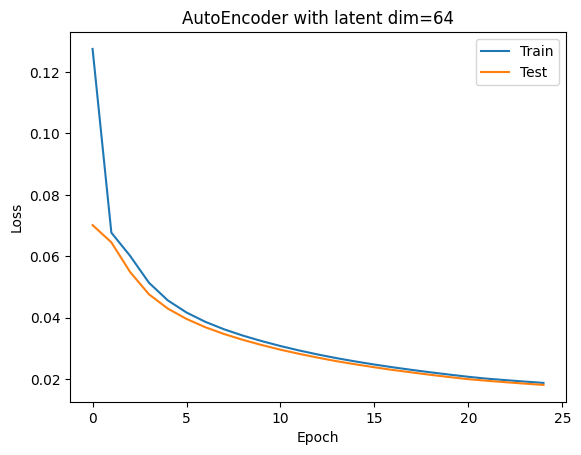

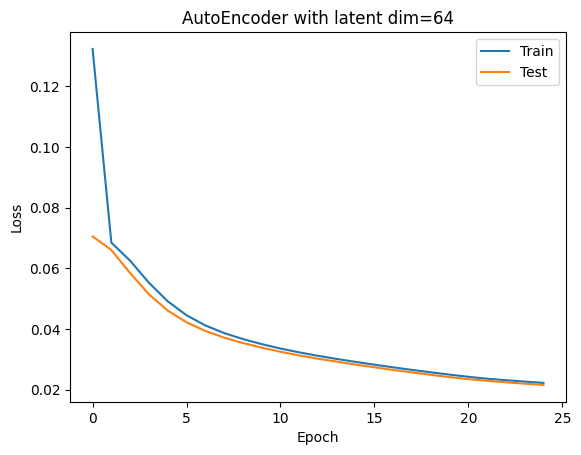

In [11]:
def plot_training_history(history, title='Model Loss'):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()


plot_training_history(history_64,title='AutoEncoder with latent dim=64')

plot_training_history(history_32,title='AutoEncoder with latent dim=64')


## Plotting Reconstructed images 

In [12]:
def plot_reconstructed_images(autoencoder,num_images=10):
    # Plot the reconstructed images for train data
    decoded_imgs_train = autoencoder.predict(x_train)
    
    plt.figure(figsize=(20, 4))
    plt.suptitle('Train Data', fontsize=16)
    for i in range(num_images):
        # Display original train image
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(x_train[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title('Original')
    
        # Display reconstructed train image
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(decoded_imgs_train[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title('Reconstructed')
    
    plt.show()

    
    # Plot the reconstructed images for test data
    decoded_imgs_test = autoencoder.predict(x_test)
    
    plt.figure(figsize=(20, 4))
    plt.suptitle('Test Data', fontsize=16)
    for i in range(num_images):
        # Display original test image
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title('Original')
    
        # Display reconstructed test image
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(decoded_imgs_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title('Reconstructed')
    
    plt.show()

    
    

## Plotting Reconstructed images with latent dim=64

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step


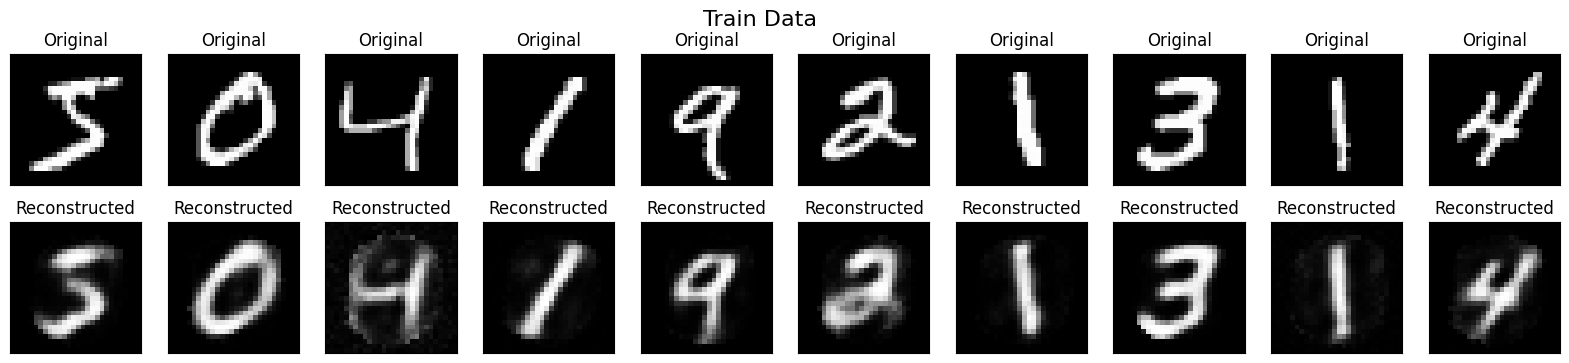

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


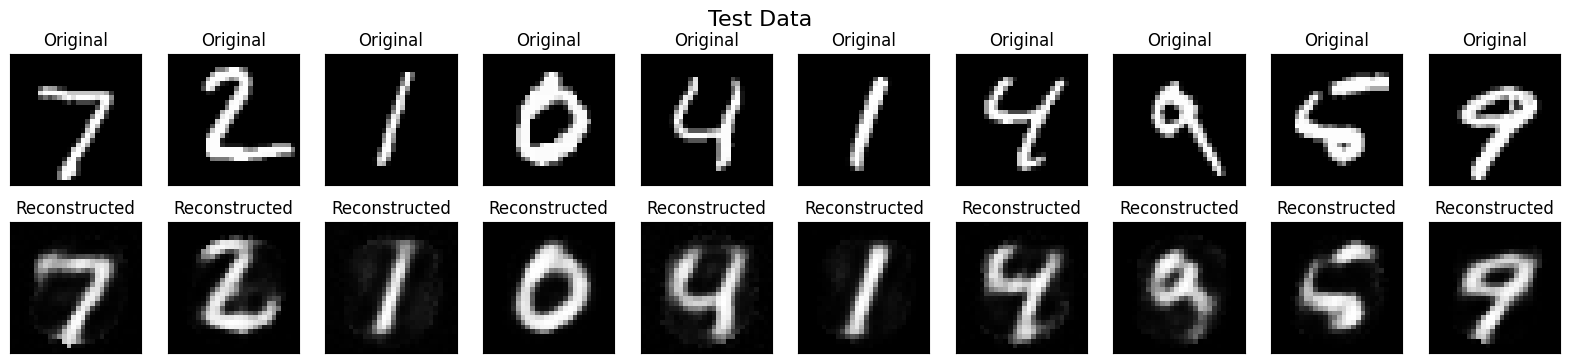

In [13]:

plot_reconstructed_images(autoencoder_64)

In [14]:
## Plotting Reconstructed images with latent dim=32

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step


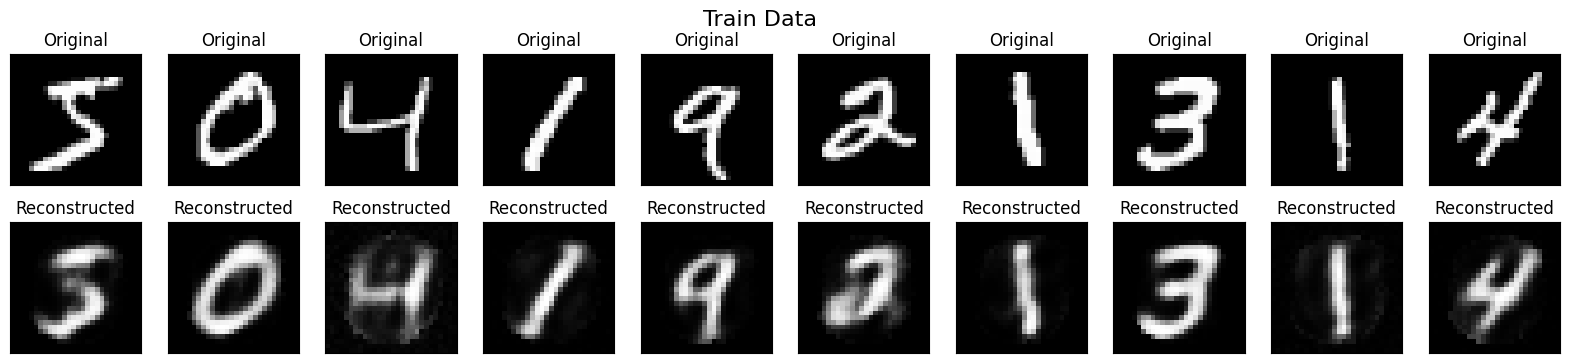

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


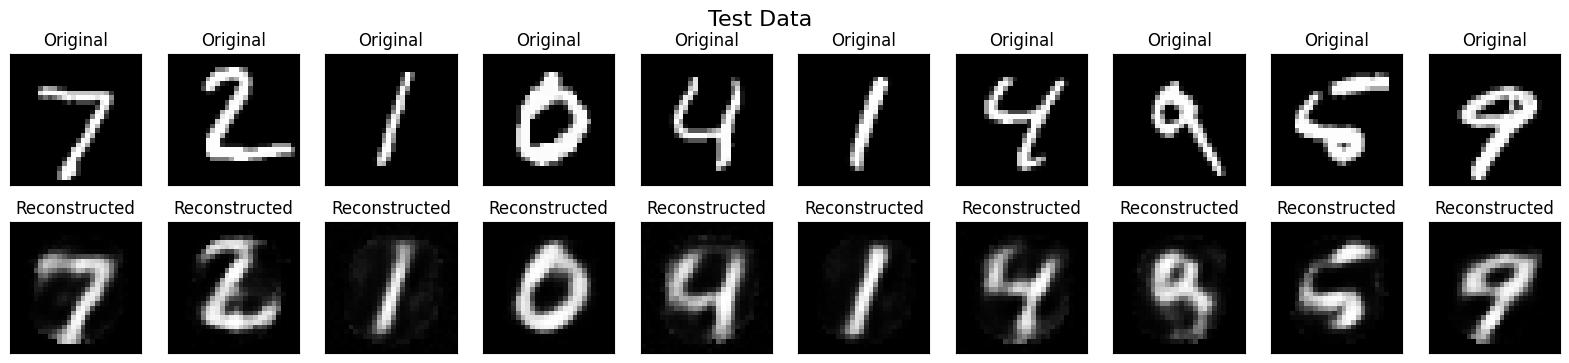

In [15]:

plot_reconstructed_images(autoencoder_32)

# Question 1(b) 
Perform the reconstruction on the line joining two training data samples in the hidden space.Consider at least 5 pairs of samples

## Plotting interpolated images using autoencoder with latent dim=64

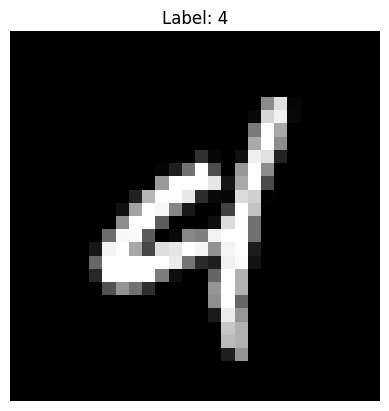

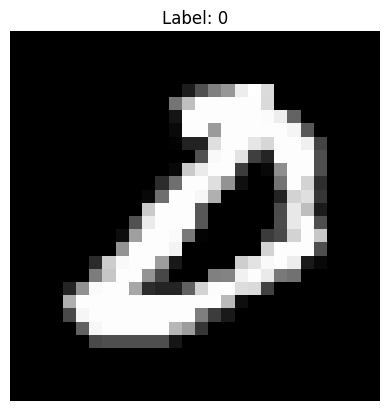

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


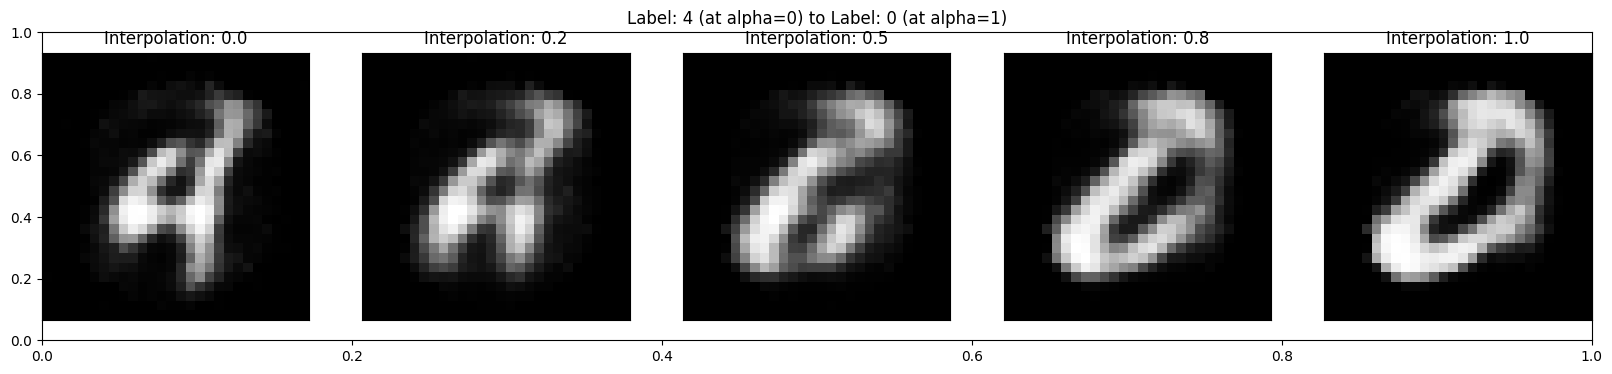

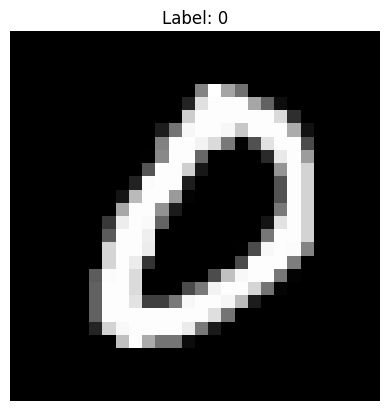

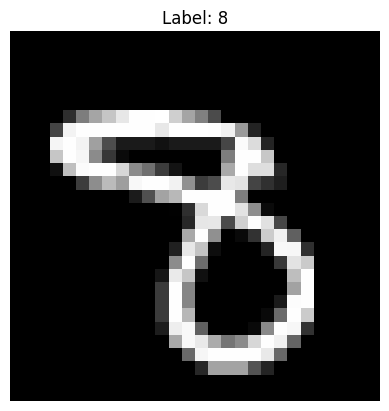

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


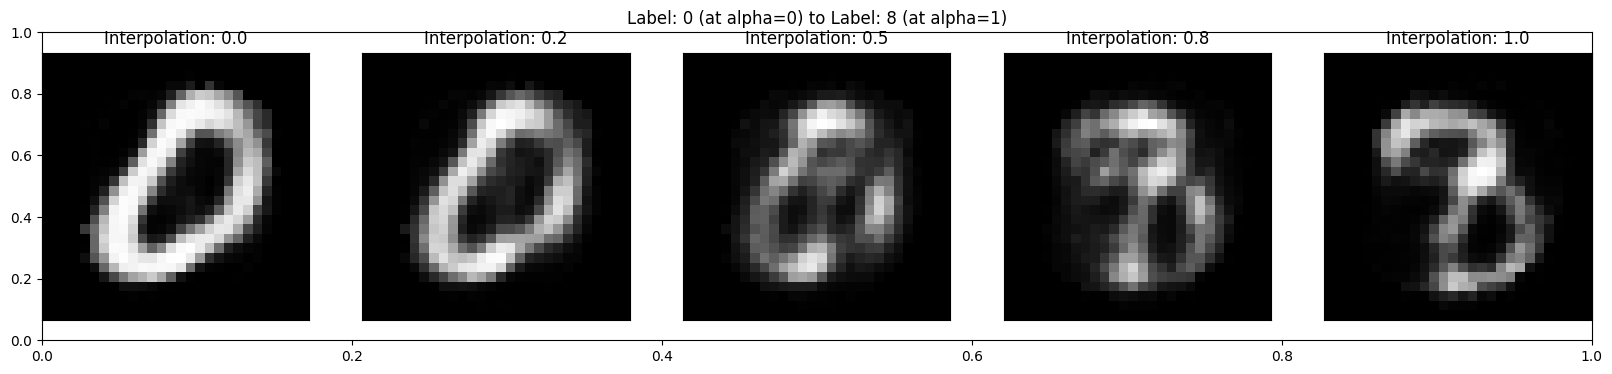

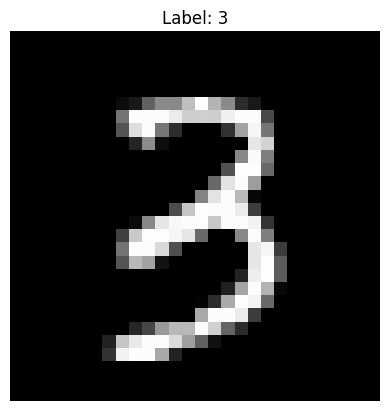

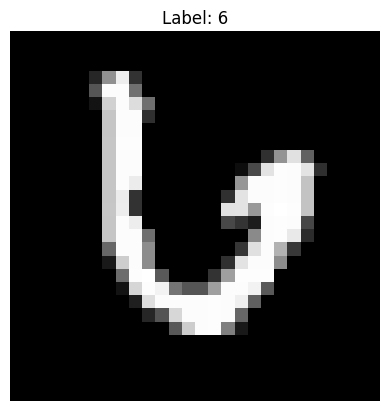

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


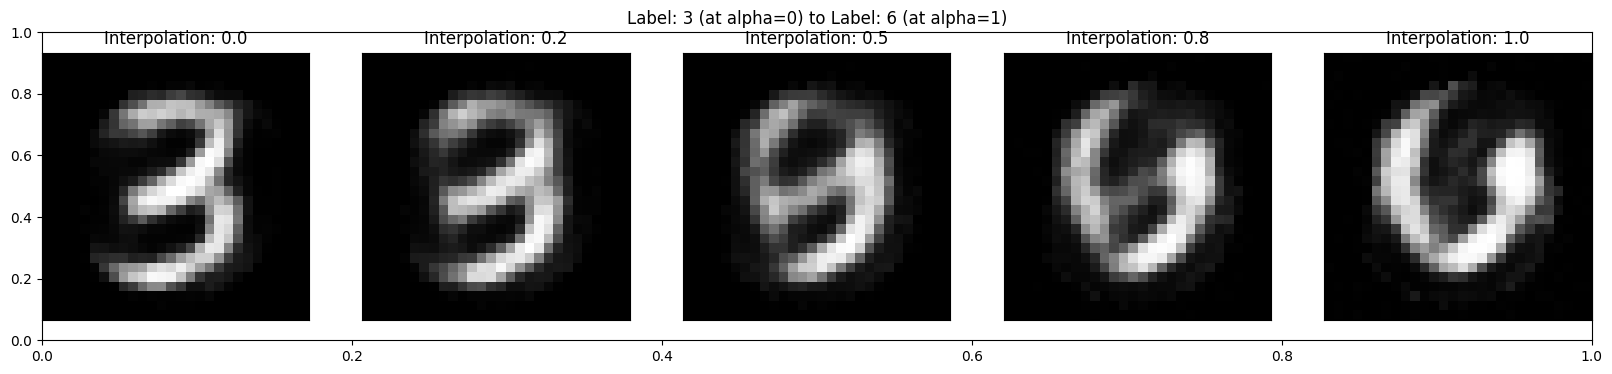

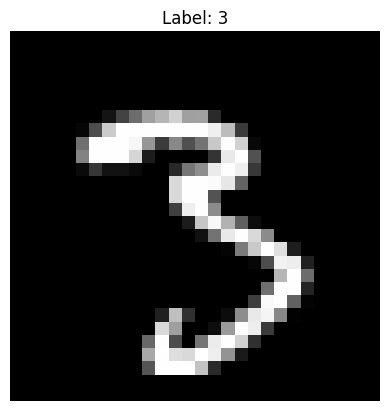

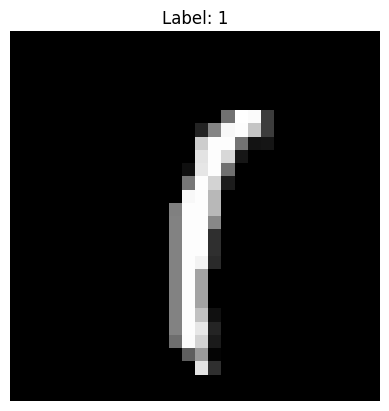

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


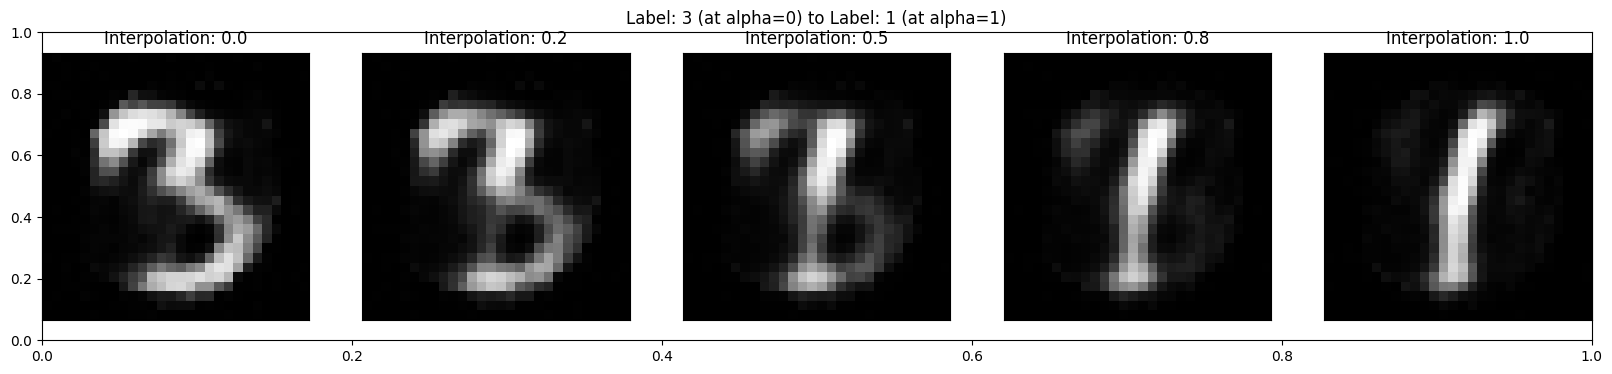

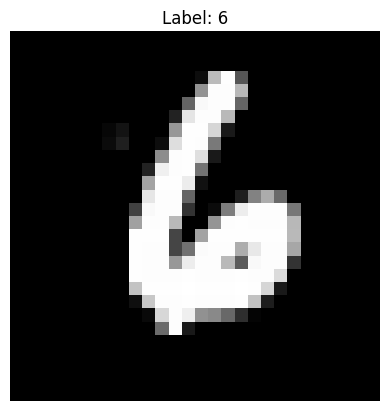

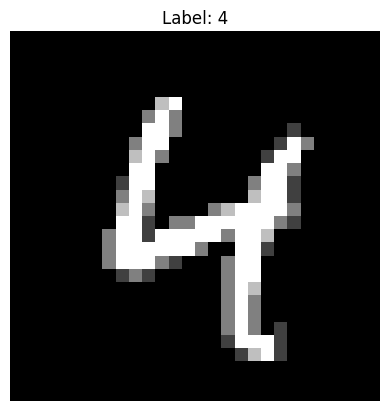

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


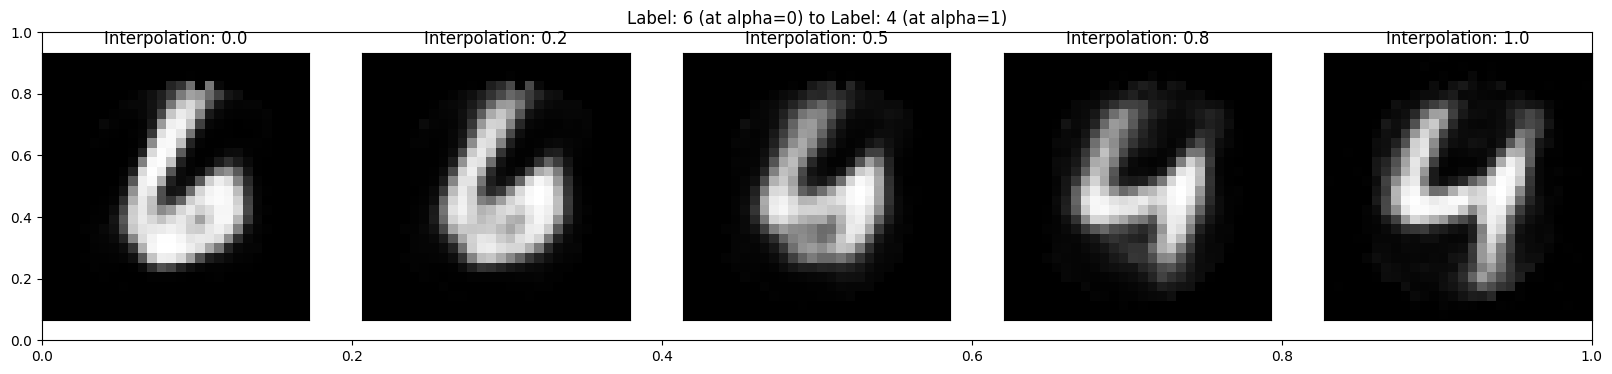

In [16]:
def plot_interpolated_images(encoder,decoder):
    
    # Select two random samples from the training data
    sample1_index = np.random.randint(0, len(x_train))
    sample2_index = np.random.randint(0, len(x_train))
    
    
    # Plot the image corresponding to sample1_index
    plt.imshow(x_train[sample1_index].reshape(28, 28))
    plt.title(f"Label: {train_labels[sample1_index]}")
    plt.gray()
    plt.axis('off')
    plt.show()
    
    
    plt.imshow(x_train[sample2_index].reshape(28, 28))
    plt.title(f"Label: {train_labels[sample2_index]}")
    plt.gray()
    plt.axis('off')
    plt.show()
    
    
    # Encode both samples into the latent space
    encoded_sample1 = encoder.predict(x_train[sample1_index].reshape(1, -1))
    encoded_sample2 = encoder.predict(x_train[sample2_index].reshape(1, -1))
    
    # Define the number of points for interpolation
    num_points = 5
    interpolated_points = []
    
    # Interpolate between the encoded representations
    for alpha in np.linspace(0, 1, num_points):
        interpolated_point = (1-alpha) * encoded_sample1 + alpha * encoded_sample2
        interpolated_points.append(interpolated_point)
    
    # Decode the interpolated points back into the original space
    reconstructed_points = decoder.predict(np.array(interpolated_points).squeeze())
    
    # Get the actual labels of the selected samples
    sample1_label = train_labels[sample1_index]
    sample2_label = train_labels[sample2_index]
    
    # Plot the reconstructed images with labels
    plt.figure(figsize=(20, 4))
    plt.title(f'Label: {sample1_label} (at alpha=0) to Label: {sample2_label} (at alpha=1)')
    for i, (reconstructed_image, alpha) in enumerate(zip(reconstructed_points, np.linspace(0, 1, num_points))):
        ax = plt.subplot(1, num_points, i + 1)
        plt.imshow(reconstructed_image.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title(f'Interpolation: {alpha:.1f}')
        
    plt.show()

for i in range(5):
    plot_interpolated_images(encoder_64,decoder_64)

## Plotting interpolated images using autoencoder with latent dim=32

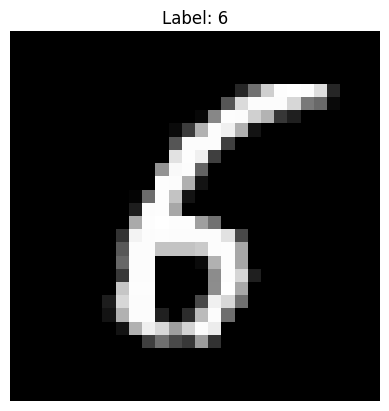

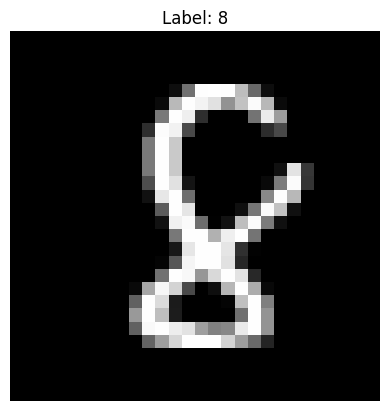

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


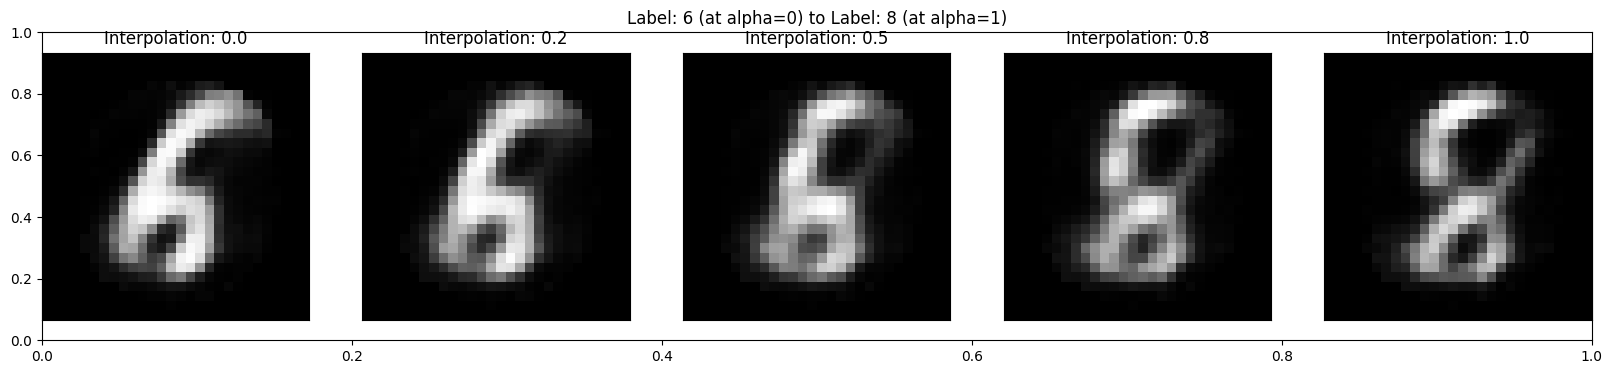

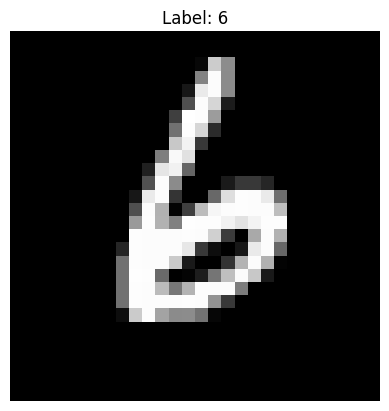

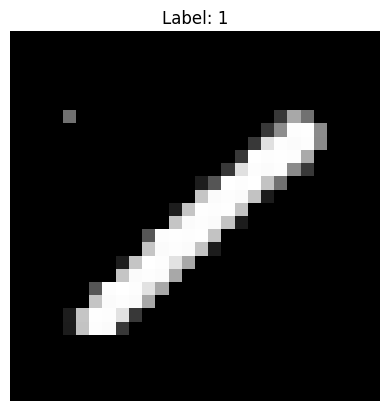

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


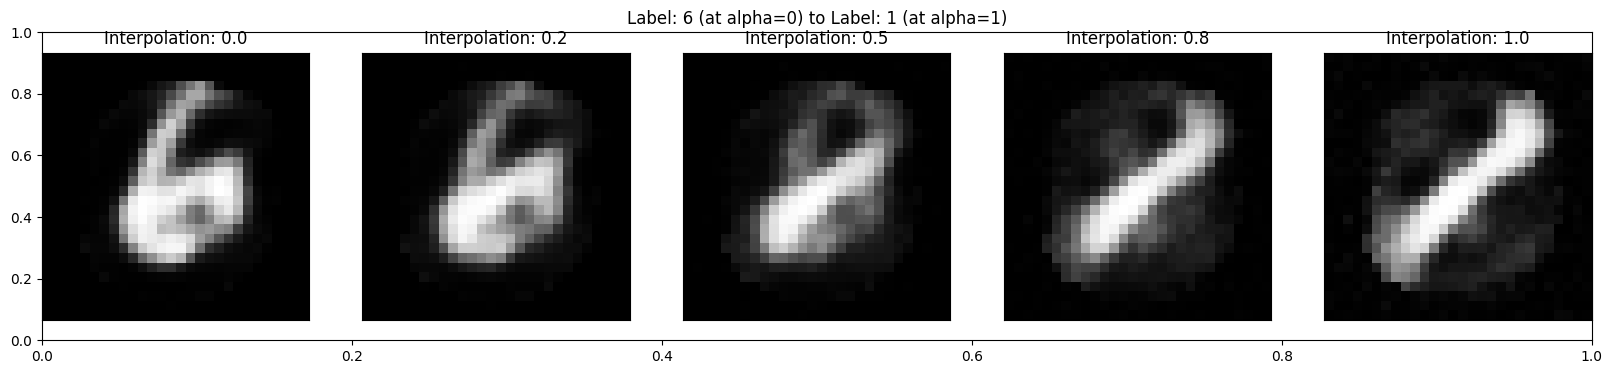

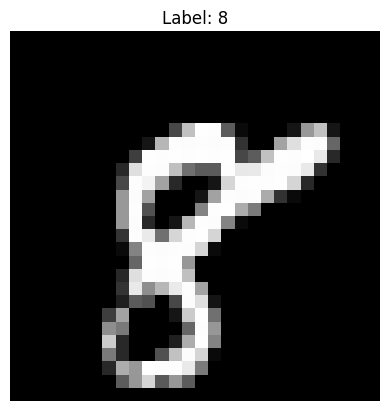

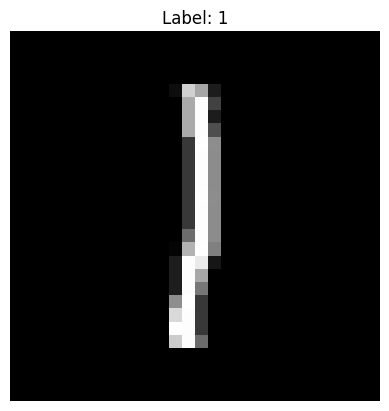

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


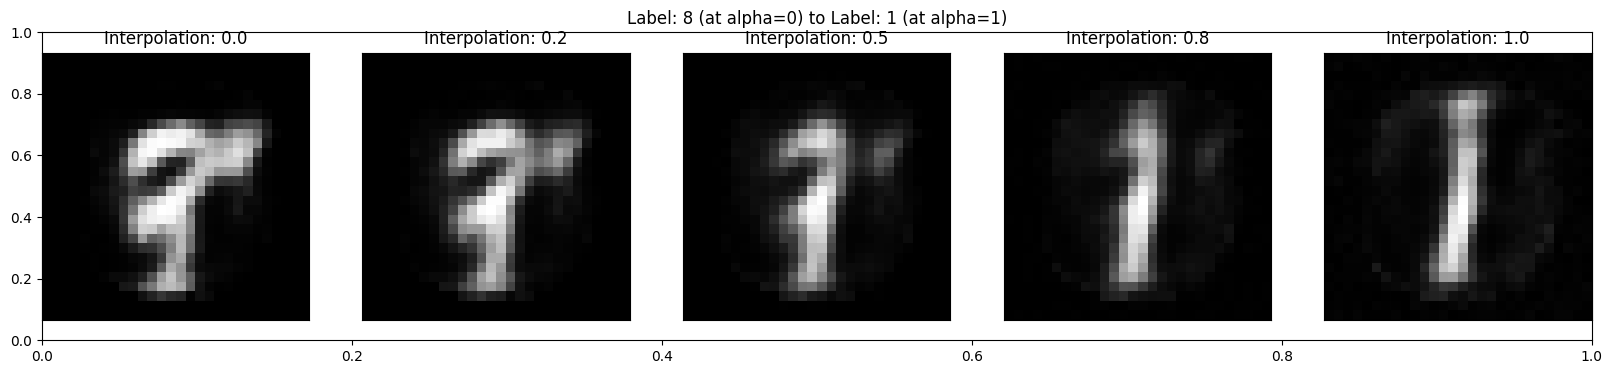

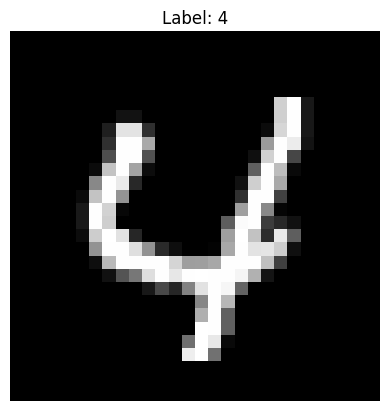

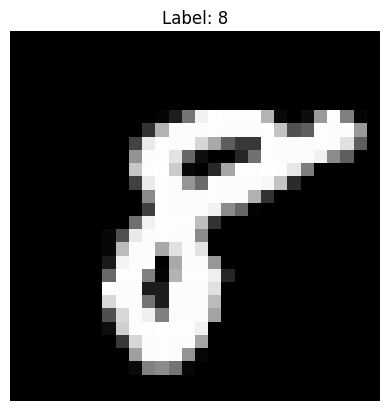

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


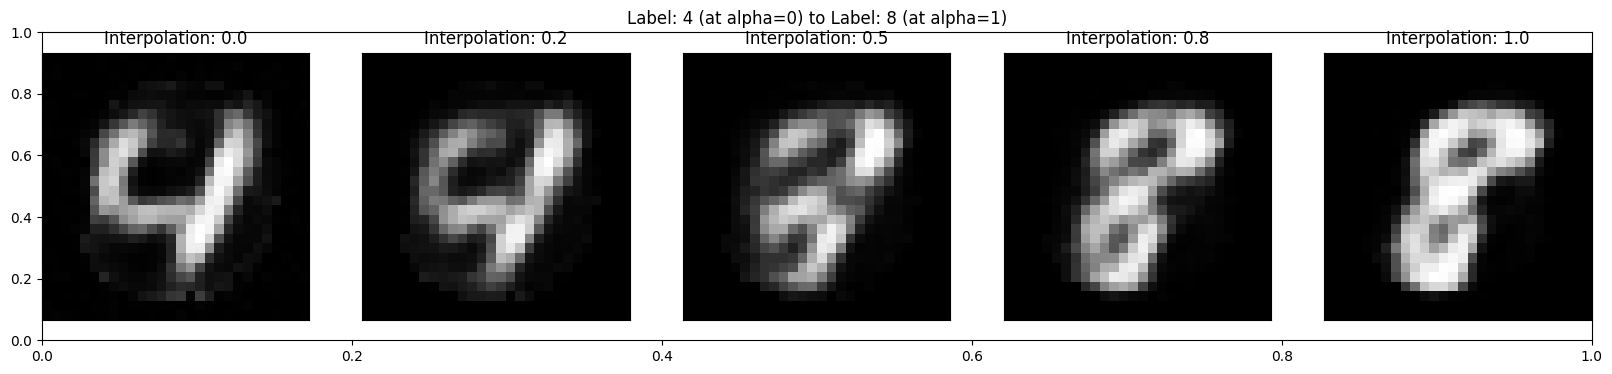

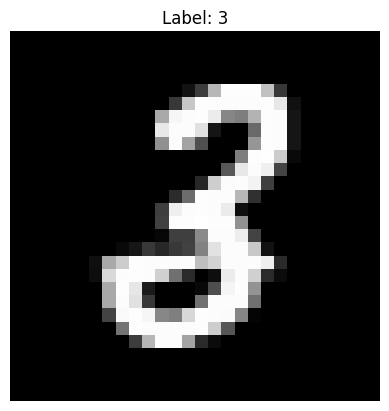

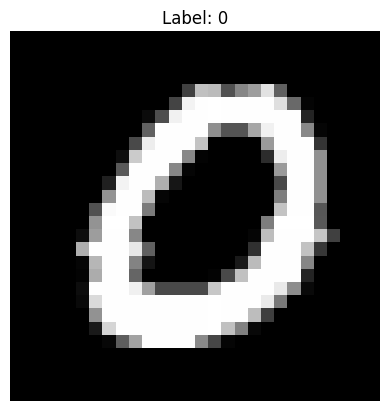

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


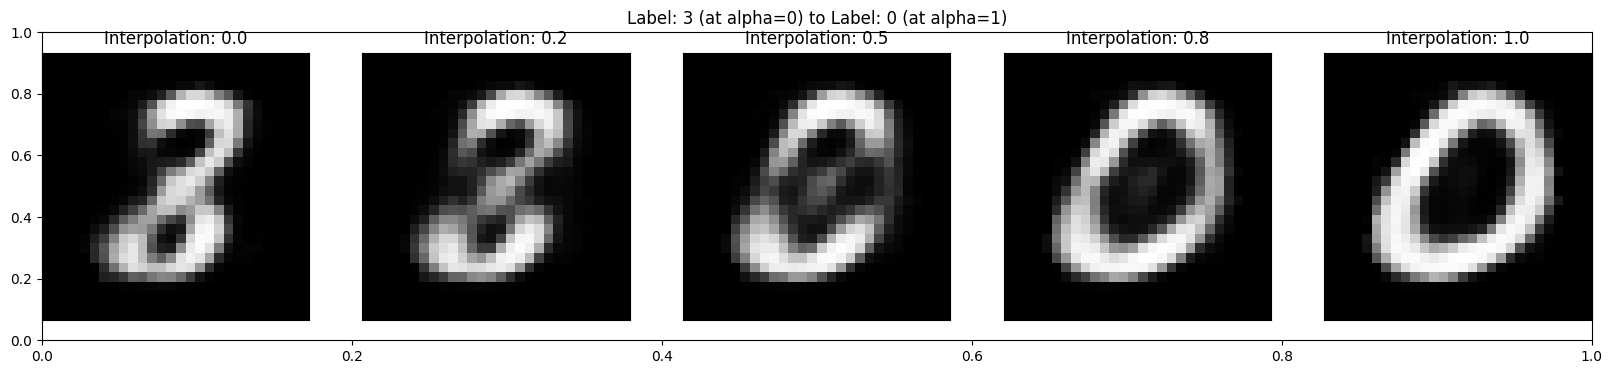

In [17]:
for i in range(5):
    plot_interpolated_images(encoder_32,decoder_32)